# Nuclear Trapping Model of dpERK and Bicoid

## Introduction
In dropsophila embryogenesis, the *Torso* gradient across the emrbyo space was found to be regulated by the ERK/MAPK signaling (Cassanova & Struhl, 1993; Li, 2005). However, how the *Torso* gradient was regulated was not clear. Threfore, Coppey et al.(2008) found that the expression level does not alter the distribution, and proposed that expressed *Torso* could be trapped in the nuclear and diffuse towards the dephosphorylated ERK (dpERK) (Fig. 1). This calls for the analysis on how dpERK is spatially distributed.

Previous to this study, the same group and other groups also investigated another morphogen, *Bicoid* (Coppey et al., 2007; Gregor et al., 2007). *Bicoid* was initially found to follow this nuclear trapping model, therefore, the spatial distribution of *Torso* can be compared to *Bicoid*. After the invesitagtion, Coppey et al.(2008) concluded that, despite the nuclear trapping model applies for both *Bicoid* and *Torso*, the gradient distribution were not the same. Therefore, it remains unclear why the difference exists.

![picture](https://drive.google.com/uc?id=1U6bNR5ysnWPp1FSauLdEQV0WN6eDmCyo)

**Fig 1.** Representation of the proposed nuclear trapping model. As the the nuclear density increased as the cell division goes on, the molecules are more aggregated at the pole. Adapted from Coppey et al.(2008)

**Hence**, the goal of this notebook is to reconstruct their mathmatical model of dpERK and *Biocoid* spatial diffusion. The expected learning outcome is to understand how the dpERK gradient is regulated and in turn influence the *Torso* gradiend and how *Biocoid* and dpERK have different spatial distribution. To understand the biological process underlying the the mathematical model, please refer to the Fig. 2 of the nuclear transport process of dpERK.

![picture](https://drive.google.com/uc?id=1udGktbCvT0RNCLAPacOv2NFoeIkjpyPf)

**Fig.2** Diapgram of nuclear/cytoplasmic dpERK transport. Note that dpERK can be degraded in both nuclear and cytoplasma. Adapted from Coppey et al.(2008)

There are four different rate constanst associated with dpERK in the model:
- $k_{c}$: the rate constant of dpERK degradation at cytoplasm
- $k_{n}$: the rate constant of dpERK degradation at nucleus
- $k_{-}$: the rate constant of dpERK transportation from nucleaus to cytoplasm
- $k_{+}$ the rate constant of dpERK transportation from cytoplasm to nucleaus

In the case of *Bicoid*, the situation is slightly different(Fig. 3).

![picture](https://drive.google.com/uc?id=1rNpsqVDkoKTZ7tDcONHtsmNCaJFyWOYG)

**Fig. 3** *Bicoid* trapping model. Here, *Bicoid* can either be free molecule and difuse, or it could also be bound to the nucleaus. Retreived from Coppey et al (2008).

There are two different rate constanst associated with *Bicoid* in the model:

𝑘− : the rate constant of *Bicoid* becoming unbound from nucleaus\
𝑘+ : the rate constant of *Bicoid* becoming bound to the nucleaus

Note that $k_{+}$ is propotional to the nuclear density $\rho$. The coefficient is $\alpha$.\

As you can see already, the *Bicoid* distribution does not have the degradation process as in *Torso* reaction. We will further discussion how this will affect the model after we plot the distribution

## Model Development

### Task 1: Solve PDE Across Time and Space: Only Diffusion Term 

In order to reconstruct the PDE model from the paper, the very first step to understand how to solve PDE on both variablity over time and space. The following Jupyter Notebook offerred great explanation on how to solve PDE over time and space using **Tyler expansion**:\
https://colab.research.google.com/drive/1H2lb6W9hT0FjCMxAg5bgaof9iAaS4mNV?usp=sharing

Since solve PDE acroos time and space is rather complicated especially in our case, let's consider a simple difussion scenerio for cytoplasmic dpERK level without reaction from the nuclear part. After understanding how to solve a second order derivative in a simple case, we will the solve the full PDE later.

Following the model diagram in Fig. 2, the simple model with only the diffusion term will be:

$
\frac{\partial C_{c}}{\partial t} = D \frac{\partial^2 C_{c}}{\partial x^2}
$

With the boundary condition:

$
D\frac{\partial C_{c}}{\partial x}|_{x = 0} = -Q, C_{c}|_{x = \infty} = 0
$

where:
- $C_{c}$ is the cytoplasmic  concentration of dpERK
- $D$ is the diffusion rate constant
- $Q$ is the dpERK generation rate at $x = 0$

Note that in terms of *Drosophila* embryo development, the space here is about the length of the embryo from the anterior end to the posterior end. The time is about the nuclear cycles(NCs) of the cells in the embryo.

With these simple diffusion PDE and boundary condtions, let's solve it with **Tyler expansion** method.

In [ ]:
#import libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [ ]:
# numerically solve over time and space
# parameters
D = 0.01
Q = -0.001
# conditions
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

Cc = np.zeros((nx,nt)) # initialize Cc
Cc[0,0] = -Q/D # inital conditions for Cc at the 0 position and 0 NC

# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
# Input your boundary condtion and equations here in the iteration:

#plot all of space for nc 11 to nc 15
fig = plt.figure(1, figsize = (6,4))
plt.xlabel("x")
plt.ylabel("Cc")
plt.title("Cellular dpERK Concentration in Simple Diffusion Model")
plt.plot(x,Cc[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cc[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cc[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cc[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cc[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.legend(loc='best')
plt.show

IndentationError: expected an indented block (<ipython-input-56-bb3de56c8441>, line 25)

#### Solution

<function matplotlib.pyplot.show(*args, **kw)>

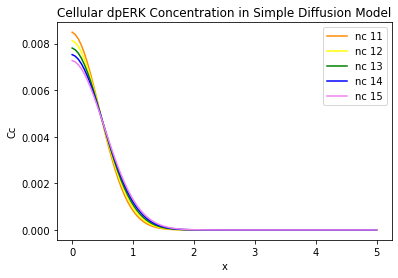

In [ ]:
# numerically solve over time and space
# parameters
D = 0.01 # diffusivity of the substrate (constant)
Q = -0.001 # generation rate
# conditions
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

Cc = np.zeros((nx,nt)) # initialize Cc
Cc[0,0] = -Q/D # inital conditions for Cc at the 0 position and 0 NC

# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
#       Boundary Conditions for model
        Cc[0,n+1] = Cc[0,n] + dt*(D*(Cc[0,n]-2*Cc[0,n]+Cc[1,n])/dx**2)
        Cc[nx-1,n+1] = 0
#       iterateing through interior nodes 
        Cc[i,n+1] = Cc[i,n] + dt*(D*(Cc[i+1,n]-2*Cc[i,n]+Cc[i-1,n])/dx**2)

#plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (6,4))
plt.xlabel("x")
plt.ylabel("Cc")
plt.title("Cellular dpERK Concentration in Simple Diffusion Model")
plt.plot(x,Cc[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cc[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cc[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cc[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cc[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.legend(loc='best')
plt.show


Looking at the plot, what do you notice? Is dpERK distribution varied much across different nuclear cycles? We will come back to this later.

### Task 2: Solve PDE Across Time and Space: Diffusion Term and Reaction Term
Now that we understand how to solve PDE with only the diffusion term, we are moving on to tackle the full model now. Let's try to solve the PDE with both diffussion term and reaction term, considering both cytoplasmic dpERK concentraion and nuclear dpERK concentraion.

The full models are as following:

$
\frac{\partial C_{c}}{\partial t} = D \frac{\partial^2 C_{c}}{\partial x^2} - (k_{+} + k_{c}) C_{c} + k_{-} C_{n}
$

$
\frac{\partial C_{n}}{\partial t} = k_{+} C_{c} - (k_{-} + k_{n})C_{n}
$

$
D\frac{\partial C_{c}}{\partial x}|_{x = 0} = -Q, C_{c}|_{x = \infty} = 0
$

where:
- $C_{c}$ and $C_{n}$ are cytoplasmic and nuclear concentration of dpERK
- $D$ is the diffusion rate constant
- $k_{+}$ and $k_{-}$ are nuclear import/export rate constant
- $Q$ is the dpERK generation rate at $x = 0$

Can you figure out how to solve it?

In [ ]:
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

D = 0.01 # diffusivity of the substrate (constant)
kp = 0.0001 # k plus
km = 0.001 # k minus
kc = 0.001 # k c
kn = 0.0001 # k n
Q = -0.001 # generation rate

Cc = np.zeros((nx,nt)) # initialize Cc
Cn = np.zeros((nx,nt)) # initialize Cn

Cc[0,0] = -Q/D # inital conditions for Cc
Cn[:,0] = 0 # inital condition for Cn


# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
# Input your equations in the iteration here:
    
# plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Cc[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cc[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cc[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cc[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cc[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Cellular dpERK concentration')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(x,Cn[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cn[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cn[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cn[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cn[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Nuclear dpERK concentration')
plt.legend(loc='best')
plt.show

IndentationError: expected an indented block (<ipython-input-4-2b046b7f0e4d>, line 31)

#### Solution

<function matplotlib.pyplot.show(*args, **kw)>

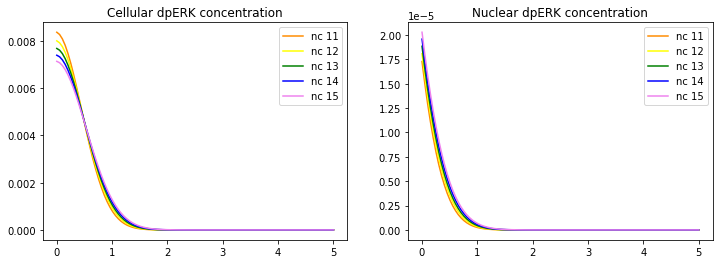

In [ ]:
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

D = 0.01 # diffusivity of the substrate (constant)
kp = 0.0001 # k plus
km = 0.001 # k minus
kc = 0.001 # k c
kn = 0.0001 # k n
Q = -0.001 # generation rate

Cc = np.zeros((nx,nt)) # initialize Cc
Cn = np.zeros((nx,nt)) # initialize Cn

Cc[0,0] = -Q/D # inital conditions for Cc
Cn[:,0] = 0 # inital condition for Cn


# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
#       Boundary Conditions for model
        Cc[0,n+1] = Cc[0,n] + dt*(D*(Cc[0,n]-2*Cc[0,n]+Cc[1,n])/dx**2)  + dt*(-(kp+kc)*Cc[0,n] + km*Cn[0,n])
        Cc[-1,n+1] = 0
#       iterate through interior nodes 
        Cc[i,n+1] = Cc[i,n] + dt*(D*(Cc[i+1,n]-2*Cc[i,n]+Cc[i-1,n])/dx**2) + dt*(-(kp+kc)*Cc[i-1,n] + km*Cn[i-1,n])
#       calculate Cn
        Cn[:,n+1] = Cn[:,n] + dt*(kp*Cc[:,n] - (km+kn)*Cn[:,n])
    
# plot all of space for nc 11 to 15
fig = plt.figure(1, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Cc[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cc[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cc[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cc[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cc[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Cellular dpERK concentration')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(x,Cn[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cn[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cn[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cn[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cn[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Nuclear dpERK concentration')
plt.legend(loc='best')
plt.show

Looking at the plot for both cytoplasmic dpERK and nuclear concentration, what do you notice? Is the variablity across different nuclear cycles similar to the simple diffusion model?

Essentially, as the number of nuclear cycles goes by, the number of cells in the embryo increases, so that the number of nuclears will be different. In this sense, what you do you think will happen comparing early nuclear cycles and later nuclear cycles? Feel free to alternate the parameters and see what happens.

### Task 3: Spatial Distribution of Total dpERK 
To test the model, the computational resutl has to be compared with the experimental result. In the experiments by Coppey et al (2008), the data was collected for both nuclear wand cytoplasmic dpERK concentration since in the experiment, the cytoplasmic and nuclear dpERK cannot be differentiated in the microscopy result. Hence, the total dpERK concentraion $C_{tot}$ follows:
$C_{tot}(x) = C_{n}(x) + C_{c}(x)$

Let's reconconstruct the model for the total dpERK:

In [ ]:
# type your code here:
# you need to intialize the total concentraion first and iterate throug the time steps

#plot the total concentration
plt.plot(x,Ct[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Ct[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Ct[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Ct[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Ct[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Total dpERK concentration')
plt.legend(loc='best')


NameError: name 'Ct' is not defined

#### Solution

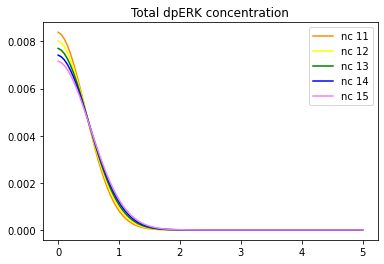

In [ ]:
Ct = np.zeros((nx,nt)) #intialize total concentration
for n in range(0,nt-1):
    Ct[:,n] = Cc[:,n] + Cn[:,n]
#plot the total concentration
plt.plot(x,Ct[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Ct[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Ct[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Ct[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Ct[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Total dpERK concentration')
plt.legend(loc='best')


If you go back to the paper, this is essentially what they discovered. Again, feel free to manipulate the parameters for different nuclear cycles and see what will happen.

### Task 4: Solve the dpERK concentration PDE as ODE  
As you probably noticed, in both the simple diffusion model and the full model, the spatial distributinon showed little variablity in different nuclear cycles. In the paper, the authors also noticed this from the experimental data. Therefore, instead of solving the PDE numerically, they solved the $C_{tot}$ using analytical method by neglecting variability across time. With this assumption, the PDE can be transformed to a set of ODE: 

$
\frac{\partial C_{c}}{\partial t} = D \frac{\partial^2 C_{c}}{\partial x^2} - (k_{+} + k_{c}) C_{c} + k_{-} C_{n} = 0
$

$
\frac{\partial C_{n}}{\partial t} = k_{+} C_{c} - (k_{-} + k_{n})C_{n} = 0
$

$
D\frac{\partial C_{c}}{\partial x}|_{x = 0} = -Q, C_{c}|_{x = \infty} = 0
$

where:
- $C_{c}$ and $C_{n}$ are cytoplasmic and nuclear concentration of dpERK
- $D$ is the diffusion rate constant
- $k_{+}$ and $k_{-}$ are nuclear import/export rate constant
- $Q$ is the dpERK generation rate at $x = 0$

With this set of equations, the following equations can be derived: 

From the equations above, these equations can be derived

$
D \frac{\partial^2 C_{c}}{\partial x^2} = (k_{+} + k_{c}) C_{c} + k_{-} C_{n}
$

$
k_{+} C_{c} = (k_{-} + k_{n})C_{n}
$

Therefore,

$
D \frac{\partial^2 C_{c}}{\partial x^2} = (k_{+} + k_{c}) C_{c} + \frac {k_{-} k_{+} }{k_{-} + k_{n}} C_{c}
$


Given that $C_{tot}(x) = C_{n}(x) + C_{c}(x)$, the following equations can be derived:

$
D\frac{\partial^2 C_{tot}}{\partial x^2} - (k_{c}+\frac{k_{n}k_{+}}{k_{-}+k_{n}})C_{tot}= 0
$

With the boundary conditons:

$
\frac{\partial C_{tot}}{\partial x}|_{x = 0} = - \frac {Q}{D}(1+\frac {k_{+}}{k_{-}+k_{n}})
$

$
C_{tot}|_{x = \infty} = 0
$

Using these equations and conditions, the final equation can be solved as: 

$C_{tot}(x) = Ae^{-\frac{x}{\lambda}}$

where

$A \equiv \frac{Q(1+k_{+}/(k_{-}+k{n}))}{\sqrt{ D(k_{c}+k_{n}k_{+}/(k_{-}+k{n}))}}$

$\lambda \equiv \sqrt {\frac{D}{k_{c}+k_{n}k_{+}/(k_{-}+k_{n})}}$

Using the same parameters, can you plot the ODE solution with the given boundary conditions?

In [ ]:
# parameters
D = 0.01 # diffusivity of the substrate (constant)
kp = 0.0001 # k plus
km = 0.001 # k minus
kc = 0.001 # k c
kn = 0.0001 # k n
Q = -0.001 # generation rate

#type the equations here:

# plot the solution
plt.xlabel("x")
plt.ylabel("Ctot")
plt.title("Total dpERK Concentration from Analytical Solution")
plt.plot(x, Ctot)

#### Solution

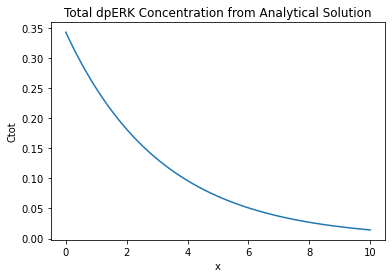

In [ ]:
# parameters
D = 0.01 # diffusivity of the substrate (constant)
kp = 0.0001 # k plus
km = 0.001 # k minus
kc = 0.001 # k c
kn = 0.0001 # k n
Q = 0.001 # generation rate

# plot the analytical model
A = (Q*(1+kp/(km+kn)))/(math.sqrt(D*(kc+kn*kp/(km+kn))))
lambda_ = math.sqrt(D/(kc+kn*kp/(km+kn)))
x = np.linspace(0,Lx,nx)
Ctot = A*math.e**(-x/lambda_)

# plot the solution
plt.xlabel("x")
plt.ylabel("Ctot")
plt.title("Total dpERK Concentration from Analytical Solution")
plt.plot(x, Ctot)

### Task 5: Spatial Distribution of Free and Bounded *Bicoid* 

Now with the dpERK distribution model built, we will use the similar setup and assumptions for the *Bicoid* distribution. In Coppey et al.(2007), the *Bicoid* was described to have two states, the free form (cytoplasmic form) or the bounded form (nuclear form) (Fig. 3).

![picture](https://drive.google.com/uc?id=1rNpsqVDkoKTZ7tDcONHtsmNCaJFyWOYG)

**Fig 3.** The conversion between free *Bicoid* and bounded *Bicoid*. Note the $k_{+}$ is proportional to the nuclear density $\rho$ withe the coeffcient of $\alpha$.

Since the *Bicoid* does not have the degradation part. The $k_{c}$ and $k_{n}$ will be 0, Therefore we have the following equations:


$
\frac{\partial C_{f}}{\partial t} = D \frac{\partial^2 C_{f}}{\partial x^2} - k_{+}C_{f} + k_{-} C_{b}
$

$
\frac{\partial C_{b}}{\partial t} = k_{+} C_{f} - k_{-} C_{b}
$

$
D\frac{\partial C_{f}}{\partial x}|_{x = 0} = -Q, C_{f}|_{x = \infty} = 0
$

where:
- $C_{f}$ and $C_{b}$ are *Bicoid* at free state and bounded state respectively
- $D$ is the diffusion rate constant
- $k_{+}$ and $k_{-}$ are nuclear import/export rate constant
- $Q$ is the *Bicod* generation rate at $x = 0$

Can you solve the PDE here for *Bicoid*?

In [ ]:
nx = 100 # number of nodes in space
nt = 100 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 15 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

#parameters
D = 0.01 # diffusivity of the substrate (constant)
kp = 0.001 # k plus
km = 0.001 # k minus
Q = -0.001 # generation rate

Cf = np.zeros((nx,nt)) # initialize Cc
Cb = np.zeros((nx,nt)) # initialize Cn

Cf[0,0] = -Q/D # inital conditions for Cc
Cb[:,0] = 0 # inital condition for Cn


# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
#   Type your code here in the iteration:

# let's plot all of space for nc 11 to 15
fig = plt.figure(1, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Cf[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cf[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cf[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cf[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cf[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Free Bicoid concentration')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(x,Cb[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cb[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cb[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cb[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cb[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Bounded Bicoid concentration')
plt.legend(loc='best')
plt.show

#### Solution

<function matplotlib.pyplot.show(*args, **kw)>

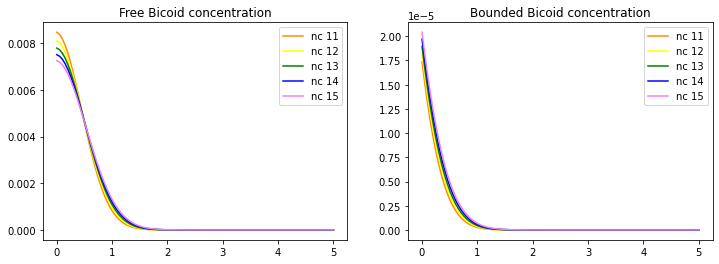

In [ ]:
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

#parameters
D = 0.01 # diffusivity of the substrate (constant)
kp = 0.0001 # k plus
km = 0.001 # k minus
Q = -0.001 # generation rate

Cf = np.zeros((nx,nt)) # initialize Cc
Cb = np.zeros((nx,nt)) # initialize Cn

Cf[0,0] = -Q/D # inital conditions for Cc
Cb[:,0] = 0 # inital condition for Cn


# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
#       Boundary Conditions for model
        Cf[0,n+1] = Cf[0,n] + dt*(D*(Cf[0,n]-2*Cf[0,n]+Cf[1,n])/dx**2)  + dt*(-kp*Cf[0,n] + km*Cb[0,n])
        Cf[-1,n+1] = 0
#       iterate through interior nodes 
        Cf[i,n+1] = Cf[i,n] + dt*(D*(Cf[i+1,n]-2*Cf[i,n]+Cf[i-1,n])/dx**2) + dt*(-kp*Cf[i-1,n] + km*Cb[i-1,n])
#       calculate Cn
        Cb[:,n+1] = Cb[:,n] + dt*(kp*Cf[:,n] - km*Cb[:,n])
    
# let's plot all of space for nc 11 to nc 15
fig = plt.figure(1, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Cf[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cf[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cf[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cf[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cf[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Free Bicoid concentration')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(x,Cb[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cb[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cb[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cb[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cb[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Bounded Bicoid concentration')
plt.legend(loc='best')
plt.show

### Task 6: Spatial distribution of Total Concentration of Bicoid

Similar to dpERK, we can only measure the total concentration of *Bicoid*. Assuming *Bicoid* has small variablity across time, then we have: 

$
C_{tot}(x) = C_{f}(x) + C_{b}(x) 
$


In [ ]:
Ct = np.zeros((nx,nt)) #intialize total concentration
for n in range(0,nt-1):
   #type your code here
#plot the total concentration
plt.plot(x,Ct[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Ct[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Ct[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Ct[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Ct[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Total dpERK concentration')
plt.legend(loc='best')


IndentationError: expected an indented block (<ipython-input-27-c91d96db53e8>, line 5)

#### Solution

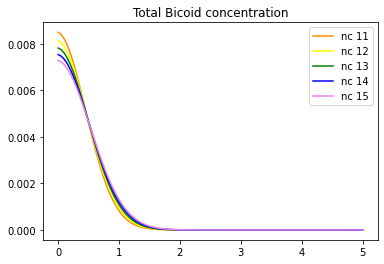

In [ ]:
Ct = np.zeros((nx,nt)) #intialize total concentration
for n in range(0,nt-1):
    Ct[:,n] = Cf[:,n] + Cb[:,n]
#plot the total concentration
plt.plot(x,Ct[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Ct[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Ct[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Ct[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Ct[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Total Bicoid concentration')
plt.legend(loc='best')


Looking at the plots, does *Bicoid* have the same distribution as *dpERK*? If so, what does infer on the function of both molecules in morphogenesis?. If not, why? Could it be the degradation nature of *dpERK*? 

### Task 7: Change the number of nuclears in the embryo development

What we have ploted before were simply a "stable" condition, where the number of nuclears was set to be the same across different nuclear cycles. However, as the nuclear cycle increases, more nuclears will be generated in the embryo and the density of nuclear increases. Therefore, the rate constant for nuclear transportation will change. We could alter the parameters to mimic the change of nuclears. In fact, that's what Coppey et al.(2008) did when constructing the model (Fig. 4).

![picture](https://drive.google.com/uc?id=1fWam-wdGp9RKDG9yLerMIXy1NOhLvbog)

**Fig. 4.** Change of the parameters across different nuclear cycles in *Bicoid* model. Retrieved from Coppey et al (2008).

Here, to increase the ratio K, we can simply increase $k_{+}$. For every increase of nuclear cycle, the $k_{+}$ doubles. In code, we can achieve this by having the same $k_{+}$ for all the nodes within a nuclear cycle and double the value from the previous nuclear cycle. See the code below:

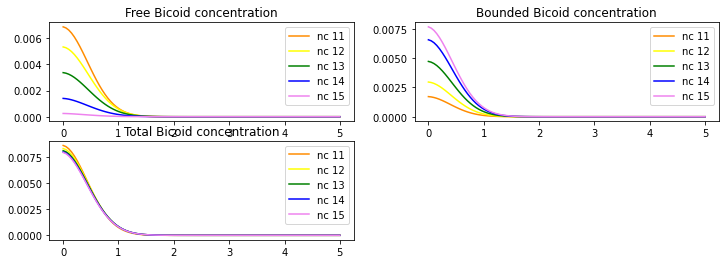

In [ ]:
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over
kp = np.zeros(Lt) # vector for the kp at each time node

#parameters
D = 0.01 # diffusivity of the substrate (constant)
kp[0] = 0.0001 # k plus
km = 0.001 # k minus
Q = -0.001 # generation rate

Cf = np.zeros((nx,nt)) # initialize Cc
Cb = np.zeros((nx,nt)) # initialize Cn

Cf[0,0] = -Q/D # inital conditions for Cc
Cb[:,0] = 0 # inital condition for Cn
# set increase kp for each nc
for i in range(1,Lt):
    kp[i] = kp[i-1] * 2
# repeat the same kp at each node within a nc
kpp = np.repeat(kp,nt/Lt)

# iterate through time with n
for n in range(0,nt-1):
    kp = kpp[n]
#   iterate through space with i
    for i in range(1,nx-2):
#       Boundary Conditions for model
        Cf[0,n+1] = Cf[0,n] + dt*(D*(Cf[0,n]-2*Cf[0,n]+Cf[1,n])/dx**2)  + dt*(-kp*Cf[0,n] + km*Cb[0,n])
        Cf[-1,n+1] = 0
#       iterate through interior nodes 
        Cf[i,n+1] = Cf[i,n] + dt*(D*(Cf[i+1,n]-2*Cf[i,n]+Cf[i-1,n])/dx**2) + dt*(-kp*Cf[i-1,n] + km*Cb[i-1,n])
#       calculate Cn
        Cb[:,n+1] = Cb[:,n] + dt*(kp*Cf[:,n] - km*Cb[:,n])

#total concentration
Ct = np.zeros((nx,nt)) #intialize total concentration
for n in range(0,nt-1):
    Ct[:,n] = Cf[:,n] + Cb[:,n]

# let's plot all of space for nc 11 to nc 15
fig = plt.figure(1,figsize = (12,4))
plt.subplot(221)
plt.plot(x,Cf[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cf[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cf[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cf[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cf[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Free Bicoid concentration')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(x,Cb[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cb[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cb[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cb[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cb[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Bounded Bicoid concentration')
plt.legend(loc='best')
plt.show
#plot the total concentration
plt.subplot(223)
plt.plot(x,Ct[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Ct[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Ct[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Ct[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Ct[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Total Bicoid concentration')
plt.legend(loc='best')

Compared with the results(Fig. 5), are they consistent? What does the result infer?

![picture](https://drive.google.com/uc?id=1Yf4427A-MnWtvRO7vVW3Yw12mF91SvLw)

**Fig. 5.** Change of the spatial distribution accounting for the nuclear density change. Retrieved from Coppey et al., 2008.

Now with the example provided, can you apply the same method to account for the change of nuclear density in the *dpERK* model? Please write the code below:

#### Solution

<function matplotlib.pyplot.show(*args, **kw)>

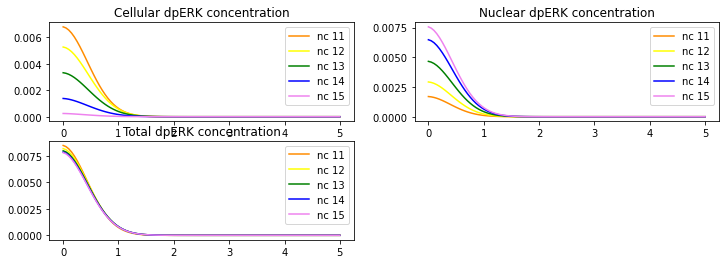

In [ ]:
nx = 100 # number of nodes in space
nt = 1000 # number of nodes in time
Lx = 5 # spatial length of model
Lt = 20 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

Cc = np.zeros((nx,nt)) # initialize Cc
Cn = np.zeros((nx,nt)) # initialize Cn
kp = np.zeros(Lt) # intialize kp

D = 0.01 # diffusivity of the substrate (constant)
kp[0] = 0.0001 # k plus
km = 0.001 # k minus
kc = 0.001 # k c
kn = 0.0001 # k n
Q = -0.001 # generation rate

# set increase kp for each nc
for i in range(1,Lt):
    kp[i] = kp[i-1] * 2
# repeat the same kp at each node within a nc
kpp = np.repeat(kp,nt/Lt)

Cc[0,0] = -Q/D # inital conditions for Cc
Cn[:,0] = 0 # inital condition for Cn


# iterate through time with n
for n in range(0,nt-1):
# use the kp at each time node
    kp = kpp[n]
#   iterate through space with i
    for i in range(1,nx-2):
#       Boundary Conditions for model
        Cc[0,n+1] = Cc[0,n] + dt*(D*(Cc[0,n]-2*Cc[0,n]+Cc[1,n])/dx**2)  + dt*(-(kp+kc)*Cc[0,n] + km*Cn[0,n])
        Cc[-1,n+1] = 0
#       iterate through interior nodes 
        Cc[i,n+1] = Cc[i,n] + dt*(D*(Cc[i+1,n]-2*Cc[i,n]+Cc[i-1,n])/dx**2) + dt*(-(kp+kc)*Cc[i-1,n] + km*Cn[i-1,n])
#       calculate Cn
        Cn[:,n+1] = Cn[:,n] + dt*(kp*Cc[:,n] - (km+kn)*Cn[:,n])

# calculate the total concentration
Ct = np.zeros((nx,nt)) #intialize total concentration
for n in range(0,nt-1):
    Ct[:,n] = Cc[:,n] + Cn[:,n]

    
# plot all of space for nc 11 to 15
fig = plt.figure(1, figsize = (12,4))
plt.subplot(221)
plt.plot(x,Cc[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cc[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cc[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cc[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cc[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Cellular dpERK concentration')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(x,Cn[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Cn[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Cn[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Cn[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Cn[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Nuclear dpERK concentration')
plt.legend(loc='best')
#plot the total concentration
plt.subplot(223)
plt.plot(x,Ct[:,int(11/Lt*nt)],'darkorange',label='nc 11')
plt.plot(x,Ct[:,int(12/Lt*nt)],'yellow',label='nc 12')
plt.plot(x,Ct[:,int(13/Lt*nt)],'green',label='nc 13')
plt.plot(x,Ct[:,int(14/Lt*nt)],'blue',label='nc 14')
plt.plot(x,Ct[:,int(15/Lt*nt)],'violet',label='nc 15')
plt.title('Total dpERK concentration')
plt.legend(loc='best')
plt.show

**(Open-End Question)** How would you propose to manipulate $k_{+}$ and $k_{-}$ to account for the nuclear density change in both *dpERK* and *Bicoid* distribution? What do you expect to see?

**(Open-End Question)** Compare the results where nuclear density change is accounted for with the "static" one in both models, what do you notice? Does this make sense biologically? 

**(Open-End Question)** Compare the *Bicoid* model and the *dpERK* model, are they different? If so, what does this infer in terms of their function and regulation? If not, why do you think causes the difference? Does the degradation term in the model causes the difference? 